In [1]:
import pandas as pd

In [2]:
!pip install imblearn

In [3]:
import imblearn as im
from imblearn.datasets import fetch_datasets

In [4]:
mammography = fetch_datasets()['mammography']

In [5]:
X = pd.DataFrame(mammography.data)
Y = pd.DataFrame(mammography.target)

In [6]:
X.shape

(11183, 6)

In [7]:
X.describe()

,0,1,2,3,4,5
count,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04,1.118300e+04
mean,1.096536e-10,1.297595e-09,5.698113e-10,-2.435706e-09,-1.120680e-09,1.459483e-09
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
25%,-7.844148e-01,-4.701953e-01,-5.916315e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
50%,-1.085769e-01,-3.949941e-01,-2.309790e-01,-8.595525e-01,-3.778657e-01,-9.457232e-01
75%,3.139489e-01,-7.649473e-02,2.198366e-01,8.202077e-01,-3.778657e-01,1.016613e+00
max,3.150844e+01,5.085849e+00,2.947777e+01,9.591164e+00,2.361712e+01,1.949027e+00


In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

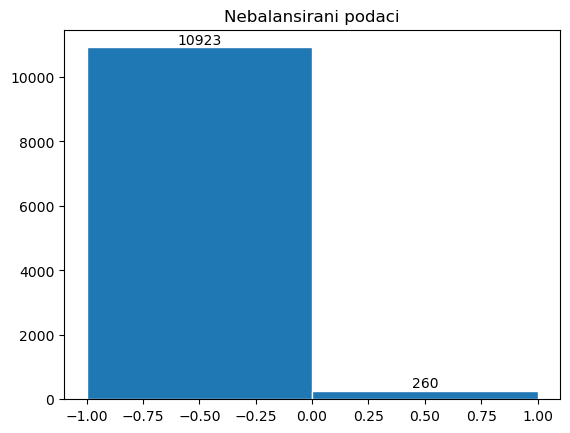

In [10]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)
bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate(f'{height}', xy={x, height}, xytext=(0, 0.2), textcoords='offset points', ha='center', va='bottom')

plt.title('Nebalansirani podaci')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [13]:
from sklearn.metrics import confusion_matrix 
from imblearn.metrics import classification_report_imbalanced 

In [14]:
def report_imbalanced(model, x, y, text='training'):
    y_pred = model.predict(x) 

    print(f'Classification report for model {type(model).__name__} on {text} data')
    print('----------------------------------------------------------------------')
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print('----------------------------------------------------------------------')

    print(f'Confusion matrix for model {type(model).__name__} on {text} data')
    print('-----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print('-----------------------------------------------------------------')

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
model_dtc = DecisionTreeClassifier(max_depth=6, min_samples_split=50, criterion='gini')

In [17]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50)

In [18]:
report_imbalanced(model_dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.50      0.99      0.71      0.53      8192
          1       0.91      0.50      1.00      0.65      0.71      0.48       195

avg / total       0.99      0.99      0.51      0.99      0.71      0.53      8387

----------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
-----------------------------------------------------------------
      B   M
B  8182  10
M    97  98
-----------------------------------------------------------------


In [19]:
report_imbalanced(model_dtc, X_test, y_test, 'test')

Classification report for model DecisionTreeClassifier on test data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.99      1.00      0.38      0.99      0.62      0.41      2731
          1       0.68      0.38      1.00      0.49      0.62      0.36        65

avg / total       0.98      0.98      0.40      0.98      0.62      0.41      2796

----------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data
-----------------------------------------------------------------
      B   M
B  2719  12
M    40  25
-----------------------------------------------------------------


In [20]:
from collections import Counter 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

'''
def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print(f'Number of instances before resamling with {type(sampler).__name__} : {Counter(Y).items()}')
    print(f'Number of instances after resampling with {type(sampler).__name__} : {Counter(y_resampled).items()}')

    return X_resampled, y_resampled
'''

def resample(sampler, X, Y):
    X_resampled, y_resampled = sampler.fit_resample(X, Y)
    print("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(Y).items()))
    print("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()))
    return X_resampled, y_resampled

In [21]:
'''def vizualize(X, X_resamled, Y, Y_resampled, x_opacity=0.5):
    pca = PCA(n_components=2)
    pca.fit(X)

    X_pac = pca.transform(X)
    X_resampled_pca = pca.transform(X_resamled)

    X_stacked = [X_pca, X_resamled_pca]
    Y_stacked = [Y, Y_resampled]

    fig = plt.figure(figsize=(20,5))

    for i in range(2):
        ax = plt.subplot(1, 2, i+1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:,0], X_stacked[i][:,1], c=colors, alpha=alpha)
        plt.title(f'{"After" if i else "Before"} resampling')
        '''

def visualize(X, X_resampled, Y, Y_resampled, x_opacity=0.5):
    """
        x_opacity - [0, 1] -> prozirnost elemenata klase (podešavati u odnosu na to da li prikazujemo samo 1 klasu ili obe)
    """
    
    #Da bismo vizuelizovali, iskoristicemo PCA da smanjimo na 2 dimenzije
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    X_pca = pca.transform(X)
    X_resampled_pca = pca.transform(X_resampled) 
    
    X_stacked = [X_pca, X_resampled_pca]
    Y_stacked = [Y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == -1 else 'r' for y in Y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in Y_stacked[i]]
        plt.scatter(X_stacked[i][:, 0], X_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()


In [22]:
def train_and_evaluate_model(X_train, Y_train, X_test, Y_test):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=25, criterion='gini')
    model.fit(X_train, Y_train)
    report_imbalanced(model, X_train, Y_train)
    report_imbalanced(model, X_test, Y_test, 'test')
    return model

In [23]:
# OVER-SAMPLING

# RandomOverSampler

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
ros = RandomOverSampler(random_state=0, sampling_strategy='minority')

Number of instances before resampling with RandomOverSampler : dict_items([(0, 1)]). 
Number of instances after  resampling with RandomOverSampler : dict_items([(0, 1)]). 


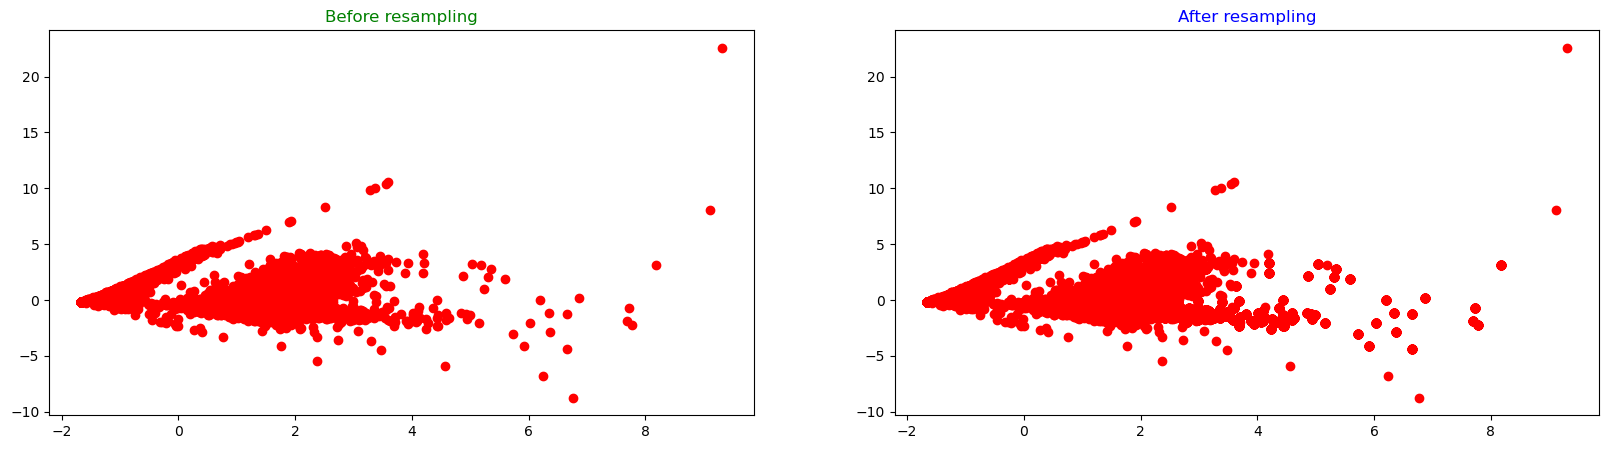

In [26]:
X_resamled, y_resampled = resample(ros, X_train, y_train)
visualize(X_train, X_resamled, y_train, y_resampled, 0)

In [27]:
model_ros = train_and_evaluate_model(X_resamled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.94      0.97      0.93      0.95      0.95      0.91      8192
          1       0.97      0.93      0.97      0.95      0.95      0.90      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

----------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
-----------------------------------------------------------------
      B     M
B  7941   251
M   538  7654
-----------------------------------------------------------------
Classification report for model DecisionTreeClassifier on test data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       ib

In [28]:
# SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
smote = SMOTE(k_neighbors=10, random_state=42)

In [31]:
X_resampled, y_resampled = resample(smote, X_train, y_train)

Number of instances before resampling with SMOTE : dict_items([(0, 1)]). 
Number of instances after  resampling with SMOTE : dict_items([(0, 1)]). 


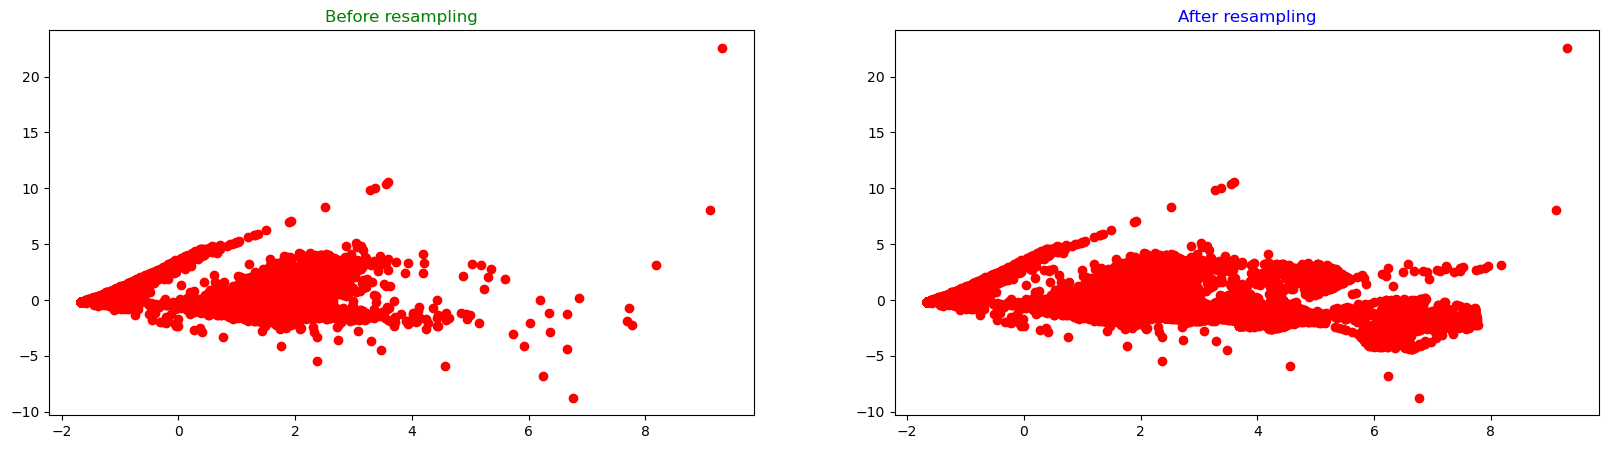

In [32]:
visualize(X_train, X_resampled, y_train, y_resampled, 0)

In [33]:
model_smote = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.95      0.96      0.95      0.95      0.95      0.91      8192
          1       0.96      0.95      0.96      0.95      0.95      0.91      8192

avg / total       0.95      0.95      0.95      0.95      0.95      0.91     16384

----------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
-----------------------------------------------------------------
      B     M
B  7862   330
M   426  7766
-----------------------------------------------------------------
Classification report for model DecisionTreeClassifier on test data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       ib

In [34]:
# UNDER-SAMPLING
# RandomUnderSampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
rus = RandomOverSampler()

Number of instances before resampling with RandomOverSampler : dict_items([(0, 1)]). 
Number of instances after  resampling with RandomOverSampler : dict_items([(0, 1)]). 


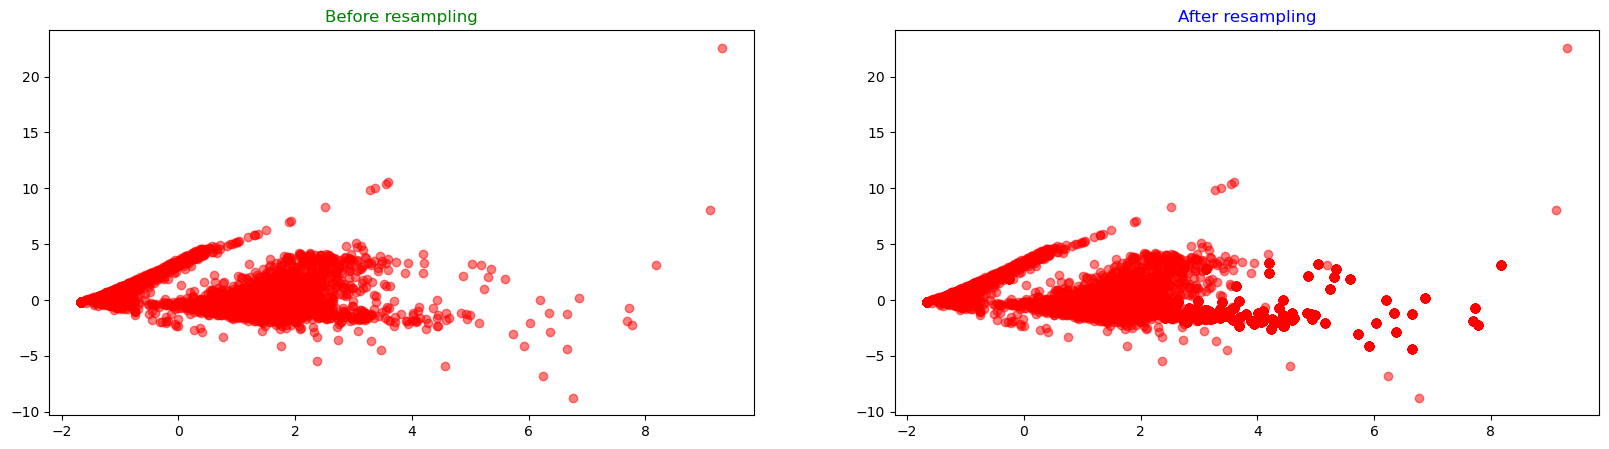

In [37]:
X_resampled, y_resampled = resample(rus, X_train, y_train)
visualize(X_train, X_resampled, y_train, y_resampled)

In [38]:
model_rus = train_and_evaluate_model(X_resampled, y_resampled, X_test, y_test)

Classification report for model DecisionTreeClassifier on training data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       iba       sup

         -1       0.96      0.97      0.96      0.96      0.96      0.92      8192
          1       0.97      0.96      0.97      0.96      0.96      0.92      8192

avg / total       0.96      0.96      0.96      0.96      0.96      0.92     16384

----------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data
-----------------------------------------------------------------
      B     M
B  7911   281
M   368  7824
-----------------------------------------------------------------
Classification report for model DecisionTreeClassifier on test data
----------------------------------------------------------------------
                   pre       rec       spe        f1       geo       ib